<a href="https://colab.research.google.com/github/FranziskoB/Analise_correspondencia_simples_multipla/blob/main/Py_Analise_Correspondencia_simples_multi_Exemplo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise por correspondência multipla

Fonte: https://www.kaggle.com/code/jiagengchang/heart-disease-multiple-correspondence-analysis

Análise de associção entre resultados de exames do dataset e doenças cardiacas.

##Importando e trantando os dados

In [1]:
!pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import prince
from scipy.stats import chi2_contingency

In [43]:
dados= pd.read_excel('https://github.com/FranziskoB/Analise_correspondencia_simples_multipla/raw/main/dados/dados_cor_acm.xlsx')

In [32]:
dados.head(5)

,Idade,Sexo,Tipo_Dor_Peito,BC_Descanço,Colesterol,Açucar_Sangue,ECG_Descanço,BC_Max,Angina_Exerc,Doença_Card
0,40,Masculino,Atipica,140,289,Normal,Normal,172,Nao,Nao
1,49,Feminino,Sem_Dor,160,180,Normal,Normal,156,Nao,Sim
2,37,Masculino,Atipica,130,283,Normal,Anormal_ST,98,Nao,Nao
3,48,Feminino,Assintomatico,138,214,Normal,Normal,108,Sim,Sim
4,54,Masculino,Sem_Dor,150,195,Normal,Normal,122,Nao,Nao


In [46]:
min(dados.Colesterol)

0

In [28]:
dados.Colesterol.quantile(0.75)

267.0

Algumas variáveis são qualitativas e outras quantitativas então vamos categorizar as variáveis quanti (por critério estatístico).

In [47]:
dados_categoricos=dados
classes_idade = [0, dados.Idade.quantile(0.25), dados.Idade.quantile(0.75), max(dados.Idade)]
labels_idade=['menores_idades','idades_médias','maiores_idades']
dados_categoricos.Idade = pd.cut(x=dados_categoricos.Idade, bins=classes_idade, labels=labels_idade)

classes_BC_Descanço = [0, dados.BC_Descanço.quantile(0.25), dados.BC_Descanço.quantile(0.75), (max(dados.BC_Descanço)+1)]
labels_BC_Descanço=['BC_Descanço_menor','BC_Descanço_medio','BC_Descanço_maior']
dados_categoricos.BC_Descanço  = pd.cut(x=dados_categoricos.BC_Descanço , bins=classes_BC_Descanço , labels=labels_BC_Descanço )

classes_BC_Max= [0, dados.BC_Max.quantile(0.25), dados.BC_Max.quantile(0.75), max(dados.BC_Max)]
labels_BC_Max=['BC_Max_menor','BC_Max_medio','BC_Max_maior']
dados_categoricos.BC_Max = pd.cut(x=dados_categoricos.BC_Max , bins=classes_BC_Max , labels=labels_BC_Max )

classes_Colesterol = [-1, dados.Colesterol.quantile(0.25), dados.Colesterol.quantile(0.75), 10000]
labels_Colesterol=['Colesterol_menor','Colesterol_medio','Colesterol_maior']
dados_categoricos.Colesterol = pd.cut(x=dados_categoricos.Colesterol , bins=classes_Colesterol, labels=labels_Colesterol )
dados = dados_categoricos

##Tabela de contingência e analise de significância estatística das associações (teste qui²)

###Sexo x Doença Cardíaca 

In [34]:
tabela_mca_1 = pd.crosstab(dados["Sexo"], dados["Doença_Card"])
print(tabela_mca_1)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_1)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card  Nao  Sim
Sexo                 
Feminino     143   50
Masculino    267  458


estatística qui²: 84.14510134633775
p-valor da estatística: 4.597617450809164e-20
graus de liberdade: 1 



###Tipo_dor_Peito x Doença Cardíaca

In [35]:
tabela_mca_2 = pd.crosstab(dados["Tipo_Dor_Peito"], dados["Doença_Card"])
print(tabela_mca_2)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_2)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card     Nao  Sim
Tipo_Dor_Peito          
Assintomatico   104  392
Atipica         149   24
Sem_Dor         131   72
Tipica           26   20


estatística qui²: 268.06723902181767
p-valor da estatística: 8.08372842808765e-58
graus de liberdade: 3 



###BC_Descanço x Doença Cardíaca

In [36]:
tabela_mca_3 = pd.crosstab(dados["BC_Descanço"], dados["Doença_Card"])
print(tabela_mca_3)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_3)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card        Nao  Sim
BC_Descanço                
BC_Descanço_menor  150  142
BC_Descanço_medio  190  215
BC_Descanço_maior   70  150


estatística qui²: 20.82569045891441
p-valor da estatística: 3.0044070744188467e-05
graus de liberdade: 2 



###Colesterol x Doença Cardíaca

In [40]:
tabela_mca_4 = pd.crosstab(dados["Colesterol"], dados["Doença_Card"])
print(tabela_mca_4)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_4)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card       Nao  Sim
Colesterol                
Colesterol_menor   31   27
Colesterol_medio  257  204
Colesterol_maior  102  125


estatística qui²: 7.164819003531016
p-valor da estatística: 0.02780861256508728
graus de liberdade: 2 



###Açucar_Sangue x Doença Cardíaca

In [10]:
tabela_mca_5 = pd.crosstab(dados["Açucar_Sangue"], dados["Doença_Card"])
print(tabela_mca_5)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_5)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card    Nao  Sim
Açucar_Sangue          
Diabetes        44  170
Normal         366  338


estatística qui²: 64.32067909335939
p-valor da estatística: 1.0573018731810034e-15
graus de liberdade: 1 



###ECG_Descançox Doença Cardíaca

In [11]:
tabela_mca_6 = pd.crosstab(dados["ECG_Descanço"], dados["Doença_Card"])
print(tabela_mca_6)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_6)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card     Nao  Sim
ECG_Descanço            
Anormal_ST       61  117
Hipertrofia_VE   82  106
Normal          267  285


estatística qui²: 10.93146933914098
p-valor da estatística: 0.004229232816754488
graus de liberdade: 2 



###BC_Max x Doença Cardíaca

In [12]:
tabela_mca_7 = pd.crosstab(dados["BC_Max"], dados["Doença_Card"])
print(tabela_mca_7)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_7)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card   Nao  Sim
BC_Max                
BC_Max_menor   59  202
BC_Max_medio  188  248
BC_Max_maior  163   58


estatística qui²: 127.48339266941984
p-valor da estatística: 2.076505160180933e-28
graus de liberdade: 2 



###Angina_Exerc x Doença Cardíaca

In [13]:
tabela_mca_8 = pd.crosstab(dados["Angina_Exerc"], dados["Doença_Card"])
print(tabela_mca_8)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_8)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card   Nao  Sim
Angina_Exerc          
Nao           355  192
Sim            55  316


estatística qui²: 222.25938271530583
p-valor da estatística: 2.907808387659878e-50
graus de liberdade: 1 



###BC_Descanço x Doença Cardíaca

In [49]:
tabela_mca_9 = pd.crosstab(dados["BC_Descanço"], dados["Doença_Card"])
print(tabela_mca_9)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_9)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card        Nao  Sim
BC_Descanço                
BC_Descanço_menor  150  142
BC_Descanço_medio  190  215
BC_Descanço_maior   70  150


estatística qui²: 20.82569045891441
p-valor da estatística: 3.0044070744188467e-05
graus de liberdade: 2 



###Idade x Doença Cardíaca

In [50]:
tabela_mca_10 = pd.crosstab(dados["Idade"], dados["Doença_Card"])
print(tabela_mca_10)
print('\n')
chi2, pvalor, df, freq_esp = chi2_contingency(tabela_mca_10)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df} \n") # graus de liberdade

Doença_Card     Nao  Sim
Idade                   
menores_idades  154   85
idades_médias   196  262
maiores_idades   60  161


estatística qui²: 65.87869493663833
p-valor da estatística: 4.95020468678594e-15
graus de liberdade: 2 



### Conclusão

Todos os variáveis tem associação significativa com doenças cardíacas

##Elaborando a MCA

matriz de Burt

In [14]:
mca = prince.MCA()
mca = mca.fit(dados)

Obtendo as coordenadas nas duas dimensões do mapa

In [15]:
print(mca.column_coordinates(dados))

                                      0         1
Idade_menores_idades           0.735280 -0.562084
Idade_idades_médias           -0.082184 -0.107739
Idade_maiores_idades          -0.686110  0.812058
Sexo_Feminino                  0.764429  0.622663
Sexo_Masculino                -0.222170 -0.171575
Tipo_Dor_Peito_Assintomatico  -0.627659 -0.238299
Tipo_Dor_Peito_Atipica         1.076110 -0.212360
Tipo_Dor_Peito_Sem_Dor         0.471663  0.312632
Tipo_Dor_Peito_Tipica          0.344905  1.896789
BC_Descanço_BC_Descanço_menor  0.340305 -0.558309
BC_Descanço_BC_Descanço_medio  0.011283 -0.020487
BC_Descanço_BC_Descanço_maior -0.534563  0.761502
Colesterol_Colesterol_menor    0.161563 -0.429102
Colesterol_Colesterol_medio    0.262371 -0.089230
Colesterol_Colesterol_maior   -0.036786  0.456205
Açucar_Sangue_Diabetes        -0.700203  0.325932
Açucar_Sangue_Normal           0.193615 -0.105067
ECG_Descanço_Anormal_ST       -0.580225  0.235677
ECG_Descanço_Hipertrofia_VE    0.001807  1.016064


Obtendo as coordenadas de cada um das observações


In [16]:
print(mca.row_coordinates(dados))

            0         1
0    0.811345 -0.146841
1    0.188102  0.271757
2    0.337304 -0.087560
3   -0.316668 -0.247014
4    0.302958  0.117845
..        ...       ...
913  0.296685  0.005123
914 -0.483986  0.273281
915 -0.520603 -0.554249
916  0.569250  0.374055
917  0.754091 -0.152379

[918 rows x 2 columns]


Obtendo os eigenvalues

In [17]:
print(mca.eigenvalues_)

[0.284316226828562, 0.13626005688095053]


Inércia principal total

In [18]:
print(mca.total_inertia_)

1.7


Obtendo a variância

In [19]:
print(mca.explained_inertia_)

[0.16724483931091882, 0.08015297463585325]


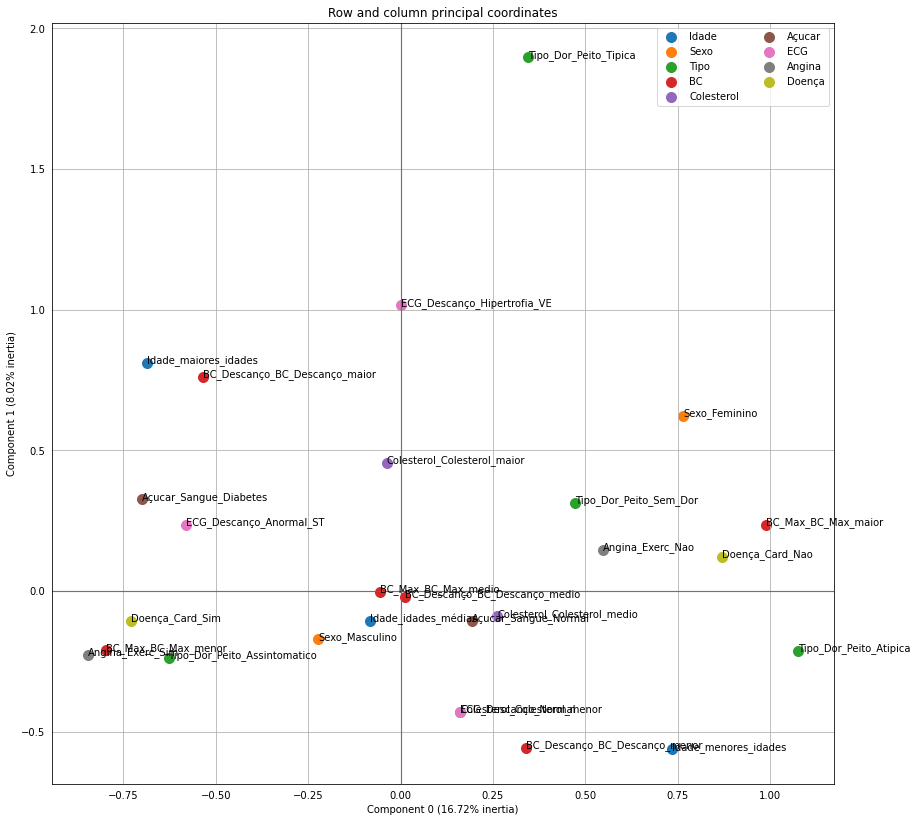

In [20]:

mp_mca = mca.plot_coordinates(
             X = dados,
             figsize=(14,14),
             show_row_points = False,
             show_column_points = True,
             show_row_labels=False,
             column_points_size = 100,
             show_column_labels = True,
             legend_n_cols = 2)

In [22]:
#Plotando o mapa perceptual interativo

import plotly.graph_objects as go
import plotly.io as pio



chart_df = pd.DataFrame({'obs_x':mca.row_coordinates(dados)[0],
                         'pacientes':dados.index,
                         'obs_y': mca.row_coordinates(dados)[1]})

fig = go.Figure(data=go.Scatter(x=chart_df['obs_x'],
                                y=chart_df['obs_y'],
                                mode='markers',
                                name="Pacientes",
                                text=chart_df['pacientes']))

fig.add_trace(go.Scatter(
    x=mca.column_coordinates(dados)[0],
    mode='markers+text',
    name="Associação",
    marker={'size':12},
    y=mca.column_coordinates(dados)[1],
    textposition="top center",
    text=mca.column_coordinates(dados).index
))

fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title_text='Mapa perceptual'
)

fig.show()
